<a href="https://colab.research.google.com/github/claudgee/spaceship-titanic/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
train = pd.read_csv('train.csv')
print(train.head())
print("\n")
print(train.isnull().sum())
print("\n")
print(train.dtypes)
print("\n")
print(train.describe)

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  




Data_observations_20251215: The train data set contains data with passenger records. There are 14 variables in the data. These variables record information about each passenger. I will need to work out some of the variables, using the documentation - e.g. PassengerID has a bit of a strange format, maybe indicating families?

In [17]:
print(train.columns)
print(train.columns[0])

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
PassengerId


In [18]:
print(train.head(1))
print(train["Transported"].sum())
print(train["Transported"].count())
print("value counts")
print(train['Transported'].value_counts())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   

   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck             Name  \
0          0.0        0.0           0.0  0.0     0.0  Maham Ofracculy   

   Transported  
0        False  
4378
8693
value counts
Transported
True     4378
False    4315
Name: count, dtype: int64


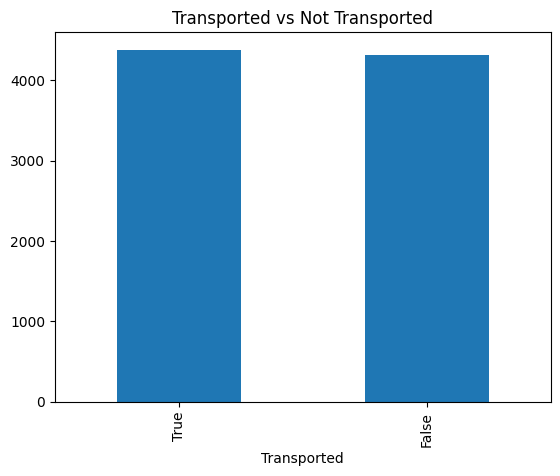

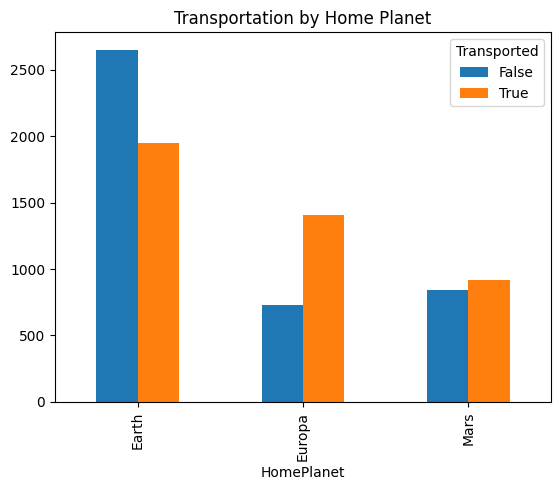

In [19]:
import matplotlib.pyplot as plt

# Target distribution
train['Transported'].value_counts().plot(kind='bar')
plt.title('Transported vs Not Transported')
plt.show()

# One feature exploration
train.groupby('HomePlanet')['Transported'].value_counts().unstack().plot(kind='bar')
plt.title('Transportation by Home Planet')
plt.show()

Data_observations_20251216: Why are there a lot of null values in a lot of columns? why do different columns have different numbers of null values? what does this mean for data cleaning. need to investigate each column to find weird data, missing data, etc., for data cleaning.

what does it mean that PassengerID, etc, contain object data not another type of data? how many people were transported?

data viz observations. More people from Earth were transported than Europa, and more people from Europa were transported than Mars. Is this just because there were more people from Earth on Spaceship Titanic? Might need to run this viz again as a percentage of people from Earth, etc, who were transported.

basically: The data shows ~8700 records but docs say 13000 passengers - missing data? Earth has more transported passengers, but is that just because more Earth passengers overall? Need to look at percentages, not raw counts

Training accuracy: 0.776
Validation_accuracy: 0.770


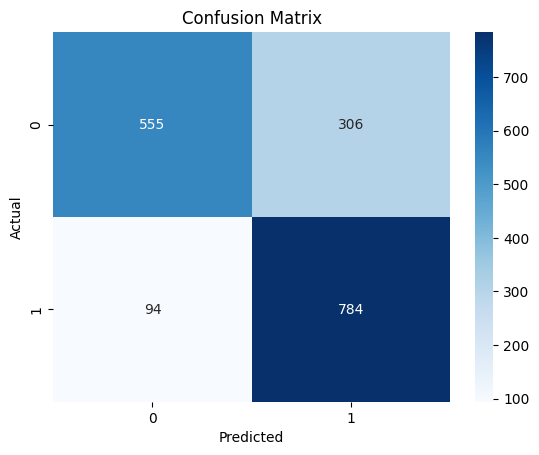

Top left + Bottom right = correct predictions
Top right + Bottom left = errors


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

X = train[features].fillna(train[features].median())
y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, model.predict(X_train))
val_acc = accuracy_score(y_val, model.predict(X_val))

print(f"Training accuracy: {train_acc:.3f}")
print(f"Validation_accuracy: {val_acc:.3f}")

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

print('Top left + Bottom right = correct predictions')
print('Top right + Bottom left = errors')


Data_observations_20251217: This is the baseline model - room for improvement by adding more features or trying different models.

Baseline accuracy 0.770
Improved accuracy: 0.776
Improvement: 0.006


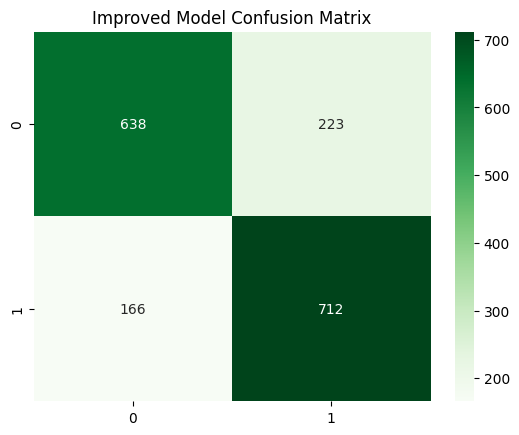

In [21]:
features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical =['HomePlanet', 'CryoSleep', 'Destination']

X_improved = train[features_numeric + features_categorical].copy()
X_improved = pd.get_dummies(X_improved, columns=features_categorical, drop_first=True)
X_improved = X_improved.fillna(X_improved.median()) # Corrected: Call .median() to get the median values

y=train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X_improved, y, test_size=0.2, random_state=42)

model_improved = LogisticRegression(max_iter=1000)
model_improved.fit(X_train, y_train)

val_acc_improved = accuracy_score(y_val, model_improved.predict(X_val)) # Corrected: 'predit' to 'predict'

print(f"Baseline accuracy 0.770")
print(f"Improved accuracy: {val_acc_improved:.3f}") # Corrected: Removed .predict
print(f"Improvement: {val_acc_improved - 0.770:.3f}")

y_pred_improved = model_improved.predict(X_val)
cm_improved = confusion_matrix(y_val, y_pred_improved)
sns.heatmap(cm_improved, annot=True, fmt='d', cmap = 'Greens')
plt.title('Improved Model Confusion Matrix')
plt.show()




Data_observations_20251218: The improved model beat the baseline, but it improved accuracy by less than 1%. Adding the categorical variables of HomePlant, CryoSLeep, and Destination in the way that we did helped a little, but there is probably a smarter way of adding them that would help more (depending on the structure of the data in each column). I.e. one-hot encoding the HomePlanet variable was probably fine, but might not be optimal data features engineering for CryoSleep and Destination, and furthermore replacing NAs with the median values might also not be optimal.

Logistic Regression: 0.776
Random Forest: 0.780
Difference: 0.004


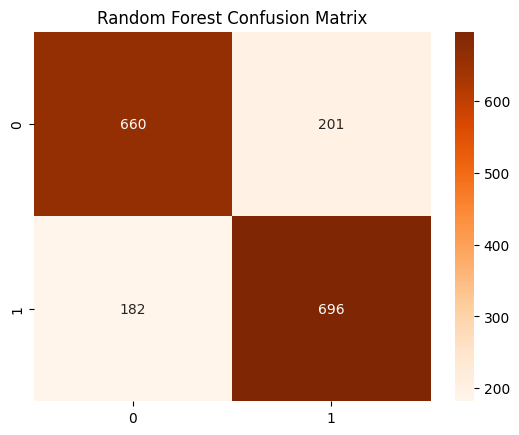

In [22]:
from sklearn.ensemble import RandomForestClassifier

X_improved = train[features_numeric + features_categorical].copy()
X_improved = pd.get_dummies(X_improved, columns=features_categorical,drop_first=True)
X_improved = X_improved.fillna(X_improved.median())

y = train["Transported"]

X_train, X_val, y_train, y_val = train_test_split(X_improved, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_val_acc = accuracy_score(y_val, rf_model.predict(X_val))

print(f"Logistic Regression: 0.776")
print(f"Random Forest: {rf_val_acc:.3f}")
print(f"Difference: {rf_val_acc - 0.776:.3f}")

rf_pred = rf_model.predict(X_val)
cm_rf = confusion_matrix(y_val, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.show()




                      feature  importance
0                         Age    0.164807
4                         Spa    0.143047
5                      VRDeck    0.127433
8              CryoSleep_True    0.123350
1                 RoomService    0.122349
2                   FoodCourt    0.121806
3                ShoppingMall    0.108866
6           HomePlanet_Europa    0.040976
7             HomePlanet_Mars    0.023434
10    Destination_TRAPPIST-1e    0.015088
9   Destination_PSO J318.5-22    0.008844


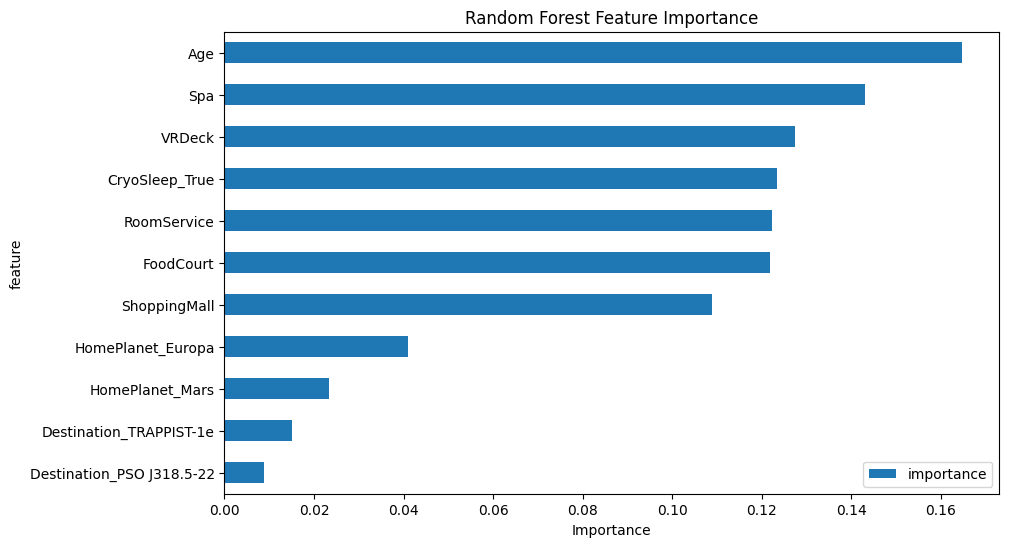

In [23]:
#Feature importance

feature_names = X_train.columns
importances = rf_model.feature_importances_


#Sort and display
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values('importance', ascending=False)
print(feat_imp)

#Visualise
feat_imp.plot(kind='barh', x='feature', y='importance', figsize=(10,6))
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel('Importance')
plt.show()







In [24]:
#some more feature engineering to see how important spending is. Aim is to create a total spending feature

X_new = X.copy()
X_new['TotalSpending'] = X_new["RoomService"] + X_new['FoodCourt'] + X_new['ShoppingMall'] + X_new['Spa'] + X_new['VRDeck']

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

rf_new = RandomForestClassifier(n_estimators=100, random_state=42)
rf_new.fit(X_train_new, y_train_new)
print(f"With TotalSpending: {accuracy_score(y_val_new, rf_new.predict(X_val_new)):.3f}")



With TotalSpending: 0.777


Data_observations_20251227: Age and spending are the most important features. But putting all the spending features into one TotalSpending feature didn't help. It's the indivdual spending that matters - i.e. how much someone spent at the spa matters more than how much someone spent at the VR deck.



In [25]:
#load test data
test = pd.read_csv("test.csv")

#prepare test data the same way as training data
X_test = test[features_numeric + features_categorical].copy()
X_test = pd.get_dummies(X_test, columns=features_categorical, drop_first=True)
X_test = X_test.fillna(X_test.median())

#make sure columns match (because sometimes test data is missing categories)
for col in X_train.columns:
  if col not in X_test.columns:
    X_test[col] = 0
X_test = X_test[X_train.columns]

#predict
predictions = rf_model.predict(X_test)

In [26]:
#create Kaggle submission

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions
})

submission.to_csv('submission.csv', index=False)
print(submission.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False


In [27]:
#what does the Cabin column look like?

print(train['Cabin'].head(20))
print("\n")
print(f"Missing values: {train['Cabin'].isnull().sum()} out of {len(train)}")
print("\n")
print(f"Example unique values: {train['Cabin'].dropna().unique()[:10]}")


0     B/0/P
1     F/0/S
2     A/0/S
3     A/0/S
4     F/1/S
5     F/0/P
6     F/2/S
7     G/0/S
8     F/3/S
9     B/1/P
10    B/1/P
11    B/1/P
12    F/1/P
13    G/1/S
14    F/2/P
15      NaN
16    F/3/P
17    F/4/P
18    F/5/P
19    G/0/P
Name: Cabin, dtype: object


Missing values: 199 out of 8693


Example unique values: ['B/0/P' 'F/0/S' 'A/0/S' 'F/1/S' 'F/0/P' 'F/2/S' 'G/0/S' 'F/3/S' 'B/1/P'
 'F/1/P']


In [28]:
#split Cabin into Deck, CabinNum, Side

train['Deck'] = train['Cabin'].str.split('/').str[0]
train['CabinNum'] = train['Cabin'].str.split('/').str[1]
train['Side'] = train['Cabin'].str.split('/').str[2]

#check what we got
print("Deck values:", train['Deck'].value_counts())
print("\nSide values:", train['Side'].value_counts())
print("\nCabinNum sample:", train['CabinNum'].head(10))

deck_transport = train.groupby('Deck')['Transported'].mean()
print(deck_transport.sort_values(ascending=False))




Deck values: Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

Side values: Side
S    4288
P    4206
Name: count, dtype: int64

CabinNum sample: 0    0
1    0
2    0
3    0
4    1
5    0
6    2
7    0
8    3
9    1
Name: CabinNum, dtype: object
Deck
B    0.734275
C    0.680054
G    0.516217
A    0.496094
F    0.439871
D    0.433054
E    0.357306
T    0.200000
Name: Transported, dtype: float64


In [29]:
#add Deck to features
features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination', 'Deck']

X_deck = train[features_numeric + features_categorical].copy()
X_deck = pd.get_dummies(X_deck, columns=features_categorical, drop_first=True)
X_deck = X_deck.fillna(X_deck.median())

y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X_deck, y, test_size=0.2, random_state = 42)

rf_deck = RandomForestClassifier(n_estimators=100, random_state=42)
rf_deck.fit(X_train, y_train)

deck_acc = accuracy_score(y_val, rf_deck.predict(X_val))
print(f"Previous best: 0.780")
print(f"With Deck: {deck_acc:.3f}")
print(f"Improvement: {deck_acc - 0.780:.3f}")

print(train.groupby('Deck')['CryoSleep'].mean())


Previous best: 0.780
With Deck: 0.779
Improvement: -0.001
Deck
A       0.272
B    0.551316
C    0.406077
D    0.222222
E    0.196262
F    0.201761
G    0.540865
T         0.0
Name: CryoSleep, dtype: object


In [30]:
#Create an "Unknown" category for missing Deck values
#extract Deck again with proper missing value handling

train['Deck'] = train['Cabin'].str.split('/').str[0]
train['Deck'] = train['Deck'].fillna('Unknown')

#check distribution
print(train['Deck'].value_counts())
print("\nTransport rate by Deck Including Unknown:")
print(train.groupby('Deck')['Transported'].mean().sort_values(ascending=False))



Deck
F          2794
G          2559
E           876
B           779
C           747
D           478
A           256
Unknown     199
T             5
Name: count, dtype: int64

Transport rate by Deck Including Unknown:
Deck
B          0.734275
C          0.680054
G          0.516217
Unknown    0.502513
A          0.496094
F          0.439871
D          0.433054
E          0.357306
T          0.200000
Name: Transported, dtype: float64


In [31]:
#rebuild features and model with proper Deck handling

features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination', 'Deck']

X_deck2 = train[features_numeric + features_categorical].copy()

#fill in numeric NAs with median
for col in features_numeric:
  X_deck2[col] = X_deck2[col].fillna(X_deck2[col].median())

#one-hot encode categorical (Deck already has 'Unknown' filled)
X_deck2 = pd.get_dummies(X_deck2, columns=features_categorical, drop_first=True)

y = train["Transported"]

X_train, X_val, y_train, y_val = train_test_split(X_deck2, y, test_size=0.2, random_state=42)

rf_deck2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_deck2.fit(X_train, y_train)

deck2_acc = accuracy_score(y_val, rf_deck2.predict(X_val))
print(f"Previous best: 0.780")
print(f"With proper Deck handling: {deck2_acc:.3f}")

Previous best: 0.780
With proper Deck handling: 0.778


In [32]:
#Checking to see if Deck is even important in the latest model - to see if Deck is being used at all
#feature importance for model with Deck
feature_names = X_train.columns
importances = rf_deck2.feature_importances_

feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values('importance', ascending=False)
print(feat_imp)



                      feature  importance
0                         Age    0.163938
4                         Spa    0.133860
5                      VRDeck    0.122994
8              CryoSleep_True    0.115632
1                 RoomService    0.115229
2                   FoodCourt    0.112634
3                ShoppingMall    0.096447
6           HomePlanet_Europa    0.025162
16                     Deck_G    0.018917
7             HomePlanet_Mars    0.017207
15                     Deck_F    0.016366
10    Destination_TRAPPIST-1e    0.015863
14                     Deck_E    0.013706
11                     Deck_B    0.008298
12                     Deck_C    0.008147
9   Destination_PSO J318.5-22    0.007854
13                     Deck_D    0.004104
18               Deck_Unknown    0.003539
17                     Deck_T    0.000102


In [33]:
#looking more into PassengerID feature
#split out into groups, then retrain the model on this and see if the splits are important

print(train['PassengerId'].head(10))

#extract group ID and position with group

train['GroupId'] = train['PassengerId'].str.split('_').str[0]
train['PersonNum'] = train['PassengerId'].str.split('_').str[1]

#calculate group size
group_sizes = train['GroupId'].value_counts()
train['GroupSize'] = train['GroupId'].map(group_sizes)

#check distribution
print("\nGroup size distribution:")
print(train['GroupSize'].value_counts().sort_index())

#transportation rate by group size
print(train.groupby('GroupSize')['Transported'].mean())




#re-training model with the group size variable added

train['GroupSize'] = train['GroupId'].map(group_sizes)

features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupSize']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination']

X_group = train[features_numeric + features_categorical].copy()

for col in features_numeric:
  X_group[col] = X_group[col].fillna(X_group[col].median())

X_group = pd.get_dummies(X_group, columns=features_categorical, drop_first=True)

y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X_group, y, test_size=0.2, random_state=42)

rf_group = RandomForestClassifier(n_estimators=100, random_state=42)
rf_group.fit(X_train, y_train)

group_acc = accuracy_score(y_val, rf_group.predict(X_val))

print(f"Previous best: 0.780")
print(f"With GroupSize: {group_acc:.3f}")

print(train.groupby('GroupSize')['CryoSleep'].mean())



0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
5    0005_01
6    0006_01
7    0006_02
8    0007_01
9    0008_01
Name: PassengerId, dtype: object

Group size distribution:
GroupSize
1    4805
2    1682
3    1020
4     412
5     265
6     174
7     231
8     104
Name: count, dtype: int64
GroupSize
1    0.452445
2    0.538050
3    0.593137
4    0.640777
5    0.592453
6    0.614943
7    0.541126
8    0.394231
Name: Transported, dtype: float64
Previous best: 0.780
With GroupSize: 0.765
GroupSize
1    0.317156
2    0.389229
3    0.425126
4    0.399497
5    0.447059
6    0.426036
7    0.471111
8    0.362745
Name: CryoSleep, dtype: object


In [34]:
#create IsSolo feature

train['IsSolo'] = (train['GroupSize'] == 1).astype(int)

#check it worked
print('IsSolo distribution:')
print(train['IsSolo'].value_counts())

print("\nSolo vs Group transportation rate:")
print(train.groupby('IsSolo')['Transported'].mean())

IsSolo distribution:
IsSolo
1    4805
0    3888
Name: count, dtype: int64

Solo vs Group transportation rate:
IsSolo
0    0.566872
1    0.452445
Name: Transported, dtype: float64


In [35]:
#training model on clean IsSolo feature

features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'IsSolo']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination']

X_solo = train[features_numeric + features_categorical].copy()

for col in features_numeric:
  X_solo[col] = X_solo[col].fillna(X_solo[col].median())

X_solo = pd.get_dummies(X_solo, columns=features_categorical, drop_first=True)

y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X_solo, y, test_size=0.2, random_state=42)

rf_solo = RandomForestClassifier(n_estimators=100, random_state=42)
rf_solo.fit(X_train, y_train)

solo_acc = accuracy_score(y_val, rf_solo.predict(X_val))
print(f"Previous best: 0.780")
print(f"With IsSolo: {solo_acc:.3f}")

Previous best: 0.780
With IsSolo: 0.772


In [36]:
#taking a step back and improving some features by doing feature engineering

#finding missing values in each column

print("Missing values by column:")
print(train.isnull().sum().sort_values(ascending=False))

print("\n\nMissing value percentage:")
print((train.isnull().sum() / len(train) * 100).sort_values(ascending=False).round(2))

print("Transportation rate by missing Age:")
print(train.groupby(train['Age'].isnull())['Transported'].mean())

print("\nTransportation rate by missing CryoSleep:")
print(train.groupby(train['CryoSleep'].isnull())['Transported'].mean())

print("\nTransportation rate by missing RoomService:")
print(train.groupby(train['RoomService'].isnull())['Transported'].mean())


Missing values by column:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
CabinNum        199
Side            199
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Deck              0
Transported       0
GroupId           0
PersonNum         0
GroupSize         0
IsSolo            0
dtype: int64


Missing value percentage:
CryoSleep       2.50
ShoppingMall    2.39
VIP             2.34
HomePlanet      2.31
Name            2.30
CabinNum        2.29
Side            2.29
Cabin           2.29
VRDeck          2.16
FoodCourt       2.11
Spa             2.11
Destination     2.09
RoomService     2.08
Age             2.06
PassengerId     0.00
Deck            0.00
Transported     0.00
GroupId         0.00
PersonNum       0.00
GroupSize       0.00
IsSolo          0.00
dtype: float64
Transportation rate by missing Age:
Age
False    0.503641

In [37]:
# Do CryoSleep passengers have spending?

cryo_true = train[train['CryoSleep'] == True]
cryo_false = train[train['CryoSleep'] == False]

print("CryoSleep=True spending averages:")
print(cryo_true[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean())

print("\nCryoSleep=False spending averages:")
print(cryo_false[['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']].mean())


CryoSleep=True spending averages:
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

CryoSleep=False spending averages:
RoomService     350.146772
FoodCourt       713.004316
ShoppingMall    270.586504
VRDeck          475.716165
dtype: float64


In [38]:
# Smarter NA filling for spending columns

spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Get medians for non=CryoSleep passengers only
non_cryo_medians = train[train['CryoSleep'] == False][spending_cols].median()
#print("Non-CryoSleep medians:")
#print(non_cryo_medians)

#for CryoSleep passengers, fill spending with 0
#for non-CryoSleep passengers, fill with non-cryo median

for col in spending_cols:
  train.loc[(train['CryoSleep'] == True) & (train[col].isnull()), col] = 0
  train.loc[(train['CryoSleep'] == False) & (train[col].isnull()), col] = non_cryo_medians[col]

#check if there are any spending NAs left?
#print("\nRemaining NAs in spending columns:")
#print(train[spending_cols].isnull().sum())

#checking rows with both CryoSleep NA and spending NA
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

cryo_null = train[train['CryoSleep'].isnull()]
print(f"Rows wih CryoSleep NA: {len(cryo_null)}")
print(f"\nSpending NAs in those rows:")
print(cryo_null[spending_cols].isnull().sum())

#fill remaining spending NAs with overall median
for col in spending_cols:
  train[col] = train[col].fillna(train[col].median())

#verify that there are no spending NAs left
#print("Spending NAs remaining:")
#print(train[spending_cols].isnull().sum())

#fill Age with median
train['Age'] = train['Age'].fillna(train['Age'].median())

#for categorical columns, fill with 'Unknown'
train['CryoSleep'] = train['CryoSleep'].fillna('Unknown')
train['HomePlanet'] = train['HomePlanet'].fillna('Unknown')
train['Destination'] = train['Destination'].fillna('Unknown')

#verify all NAs are handled
print("Remaining NAs in key columns:")
print(train[['Age', 'CryoSleep', 'HomePlanet', 'Destination']].isnull().sum())

#consolidating feature engineering of NAs by training model again with cleaned data
features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination']

X_clean = train[features_numeric + features_categorical].copy()
X_clean = pd.get_dummies(X_clean, columns=features_categorical, drop_first=True)

y=train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X_clean, y, test_size=0.2, random_state=42)

rf_clean = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clean.fit(X_train, y_train)

clean_acc = accuracy_score(y_val, rf_clean.predict(X_val))
print(f"Previous best: 0.780")
print(f"with clean preprocessing: {clean_acc:.3f}")



Rows wih CryoSleep NA: 217

Spending NAs in those rows:
RoomService     2
FoodCourt       3
ShoppingMall    8
Spa             5
VRDeck          7
dtype: int64
Remaining NAs in key columns:
Age            0
CryoSleep      0
HomePlanet     0
Destination    0
dtype: int64
Previous best: 0.780
with clean preprocessing: 0.777


In [39]:
#Looking into CabinNum feature to see if that could help

#Check CabinNum distribution
#print("CabinNum sample values:")
#print(train['CabinNum'].head(20))

#print("\nCabinNum unique vales:", train['CabinNum'].nunique())

#convert to numeric (it's stored as a string)
train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors = 'coerce')

#print("\nCabinNum stats:")
#print(train['CabinNum'].describe())

#check how much CabinNum correlats with transportation

train['CabinNumBin'] = pd.cut(train['CabinNum'], bins=10, labels=False)

print("Transportation rate by cabin position:")
print(train.groupby('CabinNumBin')['Transported'].mean())

train['CabinNumBin20'] = pd.cut(train['CabinNum'], bins=20, labels=False)

print('Transportation rate by cabin position (20 bins):')
print(train.groupby('CabinNumBin20')['Transported'].mean())

print("Passngers per 20 bins:")
print(train['CabinNumBin20'].value_counts().sort_index())


#using qcut to create the bins
#quantile-based binning - equal passengers per bin
train['CabinNumQBin'] = pd.qcut(train['CabinNum'], q=10, labels=False, duplicates='drop')

print("Passengers per quantile bin:")
print(train['CabinNumQBin'].value_counts().sort_index())

print("\nTransportation rate by quantile bin:")
print(train.groupby('CabinNumQBin')['Transported'].mean())

#check transportation rate for missing vs known CabinNum
print("Transportation rate by CabinNum missing:")
print(train.groupby(train['CabinNum'].isnull())['Transported'].mean())



Transportation rate by cabin position:
CabinNumBin
0.0    0.535235
1.0    0.517304
2.0    0.390661
3.0    0.490854
4.0    0.605475
5.0    0.621118
6.0    0.454855
7.0    0.415789
8.0    0.364286
9.0    0.453744
Name: Transported, dtype: float64
Transportation rate by cabin position (20 bins):
CabinNumBin20
0.0     0.527534
1.0     0.543767
2.0     0.546679
3.0     0.467105
4.0     0.364253
5.0     0.417431
6.0     0.488764
7.0     0.493333
8.0     0.561224
9.0     0.645260
10.0    0.650888
11.0    0.588235
12.0    0.462898
13.0    0.447368
14.0    0.396491
15.0    0.435088
16.0    0.379562
17.0    0.349650
18.0    0.462585
19.0    0.437500
Name: Transported, dtype: float64
Passngers per 20 bins:
CabinNumBin20
0.0     1253
1.0     1131
2.0     1039
3.0      608
4.0      442
5.0      436
6.0      356
7.0      300
8.0      294
9.0      327
10.0     338
11.0     306
12.0     283
13.0     304
14.0     285
15.0     285
16.0     137
17.0     143
18.0     147
19.0      80
Name: count, dtype: i

In [40]:
#testing quantile bins feature engineering

#fill NAs first
train['CabinNum'] = train['CabinNum'].fillna(train['CabinNum'].median())
train['CabinNumQBin'] = pd.qcut(train['CabinNum'], q=10, labels=False, duplicates='drop')

features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNumQBin']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination']

X_qbin = train[features_numeric + features_categorical].copy()
X_qbin = pd.get_dummies(X_qbin, columns=features_categorical, drop_first=True)

y=train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X_qbin, y, test_size=0.2, random_state=42)

rf_qbin = RandomForestClassifier(n_estimators=100, random_state=42)
rf_qbin.fit(X_train, y_train)

qbin_acc = accuracy_score(y_val, rf_qbin.predict(X_val))
print("Previous best: 0.780:")
print(f"With CabinNumQBin: {qbin_acc:3.3f}")

print("CryoSleep rate by CabinNumQBin:")
print(train.groupby('CabinNumQBin')['CryoSleep'].value_counts(normalize=True))

Previous best: 0.780:
With CabinNumQBin: 0.771
CryoSleep rate by CabinNumQBin:
CabinNumQBin  CryoSleep
0             False        0.634396
              True         0.346241
              Unknown      0.019362
1             False        0.602992
              True         0.375144
              Unknown      0.021864
2             False        0.623693
              True         0.350755
              Unknown      0.025552
3             False        0.615120
              True         0.355097
              Unknown      0.029782
4             False        0.607438
              True         0.364669
              Unknown      0.027893
5             False        0.662776
              True         0.307393
              Unknown      0.029831
6             False        0.587356
              True         0.390805
              Unknown      0.021839
7             False        0.601852
              True         0.377315
              Unknown      0.020833
8             False        0.6176

In [41]:
#seeing if removing features will reduce noise and improve the model

#get feature importance from our best model (the 0.780 one)
#first need to rebuild this model

features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical = ['HomePlanet', 'CryoSleep']

X = train[features_numeric + features_categorical].copy()
X= pd.get_dummies(X, columns=features_categorical, drop_first=True)

for col in X.columns:
  X[col] = X[col].fillna(X[col].median())

y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#rf = RandomForestClassifier(n_estimators=1000, random_state=42)
#rf.fit(X_train, y_train)

#show feature importance

#feat_imp = pd.DataFrame({
    #'feature': X_train.columns,
    #'importance': rf.feature_importances_
#}).sort_values('importance', ascending=False)

#print(feat_imp)

#removed Destination as it is not important and might just add noise

rf_slim = RandomForestClassifier(n_estimators=100, random_state=42)
rf_slim.fit(X_train, y_train)

slim_acc = accuracy_score(y_val, rf_slim.predict(X_val))
print(f"Previous best:0.780")
print(f"Without Destination column: {slim_acc:.3f}")



Previous best:0.780
Without Destination column: 0.779


In [42]:
#testing some feature interactions
#creating various feature interactions

train['Age_x_CryoSleep'] = train['Age'] * (train['CryoSleep'] == True).astype(int)
train['TotalSpend'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train['Age_x_TotalSpend'] = train['Age'] * train['TotalSpend']
train['Spa_ratio'] = train['Spa'] / train['TotalSpend']
train['Luxury_ratio'] = (train['Spa'] + train['VRDeck']) / (train['TotalSpend'] + 1)

#print("Transport rate by Age_x_CryoSleep quintiles:")
#train['Age_Cryo_bin'] = pd.qcut(train['Age_x_CryoSleep'], q=5, labels=False, duplicates='drop')
#print(train.groupby('Age_Cryo_bin')['Transported'].mean())

#trying a better way to get age Age by CrySleep by creating four explicit categories (young/old and cryosleep/not cryosleep)

#create age groups
train['AgeGroup'] = (train['Age'] > train['Age'].median()).map({True: 'Old', False: 'Young'})

#combine with CryoSleep
train['Age_Cryo_Category'] = train['AgeGroup'] + '_' + train['CryoSleep'].astype(str)

print("Categories created:")
print(train['Age_Cryo_Category'].value_counts())

print("\nTransport rate by category:")
print(train.groupby('Age_Cryo_Category')['Transported'].mean().sort_values())

print("Transport rate by Age_x_TotalSpend quintiles:")
train['Age_Spend_bin'] = pd.qcut(train['Age_x_TotalSpend'], q=5, labels=False, duplicates='drop')
print(train.groupby('Age_Spend_bin')['Transported'].mean())

print("Transport rate by Luxury_ratio quintiles:")
train['Luxury_bin'] = pd.qcut(train['Luxury_ratio'], q=5, labels=False, duplicates='drop')
print(train.groupby('Luxury_bin')['Transported'].mean())



Categories created:
Age_Cryo_Category
Young_False      2778
Old_False        2661
Young_True       1703
Old_True         1334
Young_Unknown     121
Old_Unknown        96
Name: count, dtype: int64

Transport rate by category:
Age_Cryo_Category
Old_False        0.301766
Young_False      0.354932
Old_Unknown      0.468750
Young_Unknown    0.504132
Young_True       0.791544
Old_True         0.850825
Name: Transported, dtype: float64
Transport rate by Age_x_TotalSpend quintiles:
Age_Spend_bin
0    0.636311
1    0.289413
2    0.319724
Name: Transported, dtype: float64
Transport rate by Luxury_ratio quintiles:
Luxury_bin
0    0.679831
1    0.361335
2    0.117309
Name: Transported, dtype: float64


In [43]:
#testing Age_Cryo_Category in the model

features_numeric = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical = ['HomePlanet', 'Age_Cryo_Category']

X_agecryo = train[features_numeric + features_categorical].copy()
X_agecryo = pd.get_dummies(X_agecryo, columns=features_categorical, drop_first=True)

for col in X_agecryo.columns:
    X_agecryo[col] = X_agecryo[col].fillna(X_agecryo[col].median())

y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X_agecryo, y, test_size=0.2, random_state=42)

rf_agecryo = RandomForestClassifier(n_estimators=100, random_state=42)
rf_agecryo.fit(X_train, y_train)

agecryo_acc = accuracy_score(y_val, rf_agecryo.predict(X_val))
print(f"Previous best: 0.780")
print(f"With Age_Cryo_Category: {agecryo_acc:.3f}")

Previous best: 0.780
With Age_Cryo_Category: 0.779


In [44]:
#trying Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier

features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination']

X = train[features_numeric + features_categorical].copy()
X = pd.get_dummies(X, columns=features_categorical, drop_first=True)

for col in X.columns:
    X[col] = X[col].fillna(X[col].median())

y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
    )

gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_val, gb.predict(X_val))
print(f"Random Forest best: 0.780")
print(f"Gradient Boosting: {gb_acc:.3f}")


Random Forest best: 0.780
Gradient Boosting: 0.783


In [45]:
# Rebuild the best XGBoost model
from xgboost import XGBClassifier

xgb_best = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

# Train on full training data
xgb_best.fit(X_train, y_train)

# Prepare test data the same way
test = pd.read_csv('/content/test.csv')
X_test = test[features_numeric + features_categorical].copy()
X_test = pd.get_dummies(X_test, columns=features_categorical, drop_first=True)

# Make sure columns match training data
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = 0
X_test = X_test[X.columns]

for col in X_test.columns:
    X_test[col] = X_test[col].fillna(X_test[col].median())

# Predict
predictions = xgb_best.predict(X_test)

# Create submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions
})
submission.to_csv('submission_xgb.csv', index=False)
print("Submission saved. Download and submit to Kaggle.")
print(submission.head())

print("Prediction values:")
print(submission['Transported'].value_counts())
print("\nSample of submission:")
print(submission.head(10))

submission['Transported'] = submission['Transported'].map({1: True, 0: False})

submission.to_csv('submission_xgb_fixed.csv', index=False)
print(submission.head(10))

Submission saved. Download and submit to Kaggle.
  PassengerId  Transported
0     0013_01            1
1     0018_01            0
2     0019_01            1
3     0021_01            1
4     0023_01            1
Prediction values:
Transported
1    2301
0    1976
Name: count, dtype: int64

Sample of submission:
  PassengerId  Transported
0     0013_01            1
1     0018_01            0
2     0019_01            1
3     0021_01            1
4     0023_01            1
5     0027_01            1
6     0029_01            1
7     0032_01            1
8     0032_02            1
9     0033_01            1
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True


In [46]:
#ensemble test - combining RandomForest and XGB

# Rebuild both models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Prepare data (re-upload train.csv first)
features_numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
features_categorical = ['HomePlanet', 'CryoSleep', 'Destination']

X = train[features_numeric + features_categorical].copy()
X = pd.get_dummies(X, columns=features_categorical, drop_first=True)

for col in X.columns:
    X[col] = X[col].fillna(X[col].median())

y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train both models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Get probability predictions from each
rf_probs = rf.predict_proba(X_val)[:, 1]
xgb_probs = xgb.predict_proba(X_val)[:, 1]

# Average them
ensemble_probs = (rf_probs + xgb_probs) / 2
ensemble_preds = (ensemble_probs > 0.5).astype(int)

# Compare
from sklearn.metrics import accuracy_score
print(f"Random Forest: {accuracy_score(y_val, rf.predict(X_val)):.3f}")
print(f"XGBoost: {accuracy_score(y_val, xgb.predict(X_val)):.3f}")
print(f"Ensemble: {accuracy_score(y_val, ensemble_preds):.3f}")

# Weighted ensemble - favor XGBoost
ensemble_weighted = (0.3 * rf_probs + 0.7 * xgb_probs)
ensemble_weighted_preds = (ensemble_weighted > 0.5).astype(int)

print(f"XGBoost alone: {accuracy_score(y_val, xgb.predict(X_val)):.3f}")
print(f"Weighted ensemble (30/70): {accuracy_score(y_val, ensemble_weighted_preds):.3f}")

Random Forest: 0.777
XGBoost: 0.790
Ensemble: 0.782
XGBoost alone: 0.790
Weighted ensemble (30/70): 0.787


In [47]:
#training XGBost on all training data

xgb_full = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb_full.fit(X, y)

#prepare test data

test=pd.read_csv('/content/test.csv')
X_test = test[features_numeric + features_categorical].copy()
X_test = pd.get_dummies(X_test, columns=features_categorical, drop_first=True)

#match columns
for col in X.columns:
  if col not in X_test.columns:
    X_test[col] = 0
X_test=X_test[X.columns]

for col in X_test.columns:
  X_test[col] = X_test[col].fillna(X_test[col].median())

#predict and format
predictions = xgb_full.predict(X_test)
submission = pd.DataFrame({
    'PassengerID': test['PassengerId'],
    'Transported': predictions
  })

submission['Transported'] = submission['Transported'].map({1: True, 0: False})

submission.to_csv('submission_full_data.csv', index=False)
print("Saved. Download and submit to Kaggle")


Saved. Download and submit to Kaggle


In [48]:
import pandas as pd
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load fresh data
train = pd.read_csv('/content/train.csv')

# 1. Extract from Cabin: Deck, CabinNum, Side
train['Deck'] = train['Cabin'].str.split('/').str[0]
train['CabinNum'] = train['Cabin'].str.split('/').str[1]
train['Side'] = train['Cabin'].str.split('/').str[2]
train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors='coerce')

# 2. Extract from PassengerId: GroupSize, IsSolo
train['GroupId'] = train['PassengerId'].str.split('_').str[0]
group_sizes = train['GroupId'].value_counts()
train['GroupSize'] = train['GroupId'].map(group_sizes)
train['IsSolo'] = (train['GroupSize'] == 1).astype(int)

# 3. Convert booleans to strings (TF-DF requirement)
train['CryoSleep'] = train['CryoSleep'].astype(str)
train['VIP'] = train['VIP'].astype(str)

# 4. Convert target to int
train['Transported'] = train['Transported'].astype(int)

# Select all features (TF-DF handles NAs and categoricals natively)
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
            'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Deck', 'CabinNum', 'Side', 'GroupSize', 'IsSolo']

# Train/val split
train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

# Convert to TensorFlow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data[features + ['Transported']], label='Transported')
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_data[features + ['Transported']], label='Transported')

# Train model
model_default = tfdf.keras.GradientBoostedTreesModel(verbose=0)
model_default.fit(train_ds)

# Evaluate
val_preds = (model_default.predict(val_ds) > 0.5).astype(int).flatten()
baseline_acc = accuracy_score(val_data['Transported'].values, val_preds)
print(f"Baseline (defaults): {baseline_acc:.4f}")


### Hyperparameter tuning experiments
for min_ex in [3, 5, 10, 20]:
  model = tfdf.keras.GradientBoostedTreesModel(max_depth=8, shrinkage=0.1, min_examples=min_ex, verbose=0)
  model.fit(train_ds)
  val_preds = (model.predict(val_ds) > 0.5).astype(int).flatten()
  acc = accuracy_score(val_data['Transported'].values, val_preds)
  print(f"min_examples={min_ex}: {acc:.4f}")



2/2 [==============================] - 0s 12ms/step
Baseline (defaults): 0.8022
2/2 [==============================] - 0s 10ms/step
min_examples=3: 0.8039
2/2 [==============================] - 0s 16ms/step
min_examples=5: 0.8045
2/2 [==============================] - 0s 17ms/step
min_examples=10: 0.7930
2/2 [==============================] - 0s 31ms/step
min_examples=20: 0.8028


In [51]:
# Redefine features list
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
            'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Deck', 'CabinNum', 'Side', 'GroupSize', 'IsSolo'] # Added 'GroupSize' back to the features list

#train final model with best hyperparameters on training data
model_tuned = tfdf.keras.GradientBoostedTreesModel(verbose=0)
model_tuned.fit(train_ds)

# Prepare test data with same preprocessing
test = pd.read_csv('/content/test.csv')

test['Deck'] = test['Cabin'].str.split('/').str[0]
test['CabinNum'] = test['Cabin'].str.split('/').str[1]
test['Side'] = test['Cabin'].str.split('/').str[2]
test['CabinNum'] = pd.to_numeric(test['CabinNum'], errors='coerce')

test['GroupId'] = test['PassengerId'].str.split('_').str[0]
test_group_sizes = test['GroupId'].value_counts()
test['GroupSize'] = test['GroupId'].map(test_group_sizes)
test['IsSolo'] = (test['GroupSize'] == 1).astype(int)

test['CryoSleep'] = test['CryoSleep'].astype(str)
test['VIP'] = test['VIP'].astype(str)

# Create test dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test[features])

# Predict
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test[features])
predictions = model_tuned.predict(test_ds)
pred_binary = (predictions > 0.5).astype(int).flatten()


# Create submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': pred_binary
})

submission['Transported'] = submission['Transported'].map({1: True, 0: False})
submission.to_csv('submission_tfdf_features_default.csv', index=False)
print("Saved! Download and submit to Kaggle.")

5/5 [==============================] - 0s 28ms/step
Saved! Download and submit to Kaggle.


In [53]:
#checking Deck Side combination

train['Deck_Side'] = train['Deck'].astype(str) + '_' + train['Side'].astype(str)

#check signal
print("Transport rate by Deck_Side (sorted):")
deck_side_rates = train.groupby('Deck_Side')['Transported'].mean().sort_values()
print(deck_side_rates)
print(f"\nSpread: {deck_side_rates.max():.2f} - {deck_side_rates.min():.2f} = {deck_side_rates.max() - deck_side_rates.min():.2f}")



Transport rate by Deck_Side (sorted):
Deck_Side
T_S        0.000000
T_P        0.250000
E_P        0.342657
E_S        0.371365
D_P        0.403226
F_P        0.410987
A_P        0.435897
G_P        0.448276
D_S        0.465217
F_S        0.470501
nan_nan    0.502513
A_S        0.546763
C_P        0.580645
G_S        0.583788
B_P        0.674221
C_S        0.763547
B_S        0.784038
Name: Transported, dtype: float64

Spread: 0.78 - 0.00 = 0.78


In [54]:
#retraining model with Deck Side combo

features_with_deckside = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'CabinNum', 'Side', 'GroupSize', 'IsSolo', 'Deck_Side']

train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data[features_with_deckside + ['Transported']], label='Transported')
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_data[features_with_deckside + ['Transported']], label='Transported')

model_deckside = tfdf.keras.GradientBoostedTreesModel(verbose=0)
model_deckside.fit(train_ds)

val_preds = (model_deckside.predict(val_ds) > 0.5).astype(int).flatten()
acc = accuracy_score(val_data['Transported'].values, val_preds)

print(f"Baseline (defaults): 0.8022")
print(f"With Deck_Side: {acc:.4f}")



2/2 [==============================] - 0s 18ms/step
Baseline (defaults): 0.8022
With Deck_Side: 0.8108


In [56]:
#preparing Deck Side model for submission to Kaggle

test = pd.read_csv('/content/test.csv')

test['Deck'] = test['Cabin'].str.split('/').str[0]
test['CabinNum'] = test['Cabin'].str.split('/').str[1]
test['Side'] = test['Cabin'].str.split('/').str[2]
test['CabinNum'] = pd.to_numeric(test['CabinNum'], errors='coerce')

test['GroupId'] = test['PassengerId'].str.split('_').str[0]
test_group_sizes = test['GroupId'].value_counts()
test['GroupSize'] = test['GroupId'].map(test_group_sizes)
test['IsSolo'] = (test['GroupSize'] == 1).astype(int)

test['CryoSleep'] = test['CryoSleep'].astype(str)
test['VIP'] = test['VIP'] = test['VIP'].astype(str)

#NEW: add Deck_Side
test['Deck_Side'] = test['Deck'].astype(str) + '_' + test['Side'].astype(str)

#predict
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test[features_with_deckside])
predictions = model_deckside.predict(test_ds)
pred_binary = (predictions > 0.5).astype(int).flatten()

#create submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': pred_binary
})
submission['Transported'] = submission['Transported'].map({1: True, 0: False})
submission.to_csv('submission_deckside.csv', index=False)
print("Saved! Download and submit to Kaggle")

5/5 [==============================] - 0s 20ms/step
Saved! Download and submit to Kaggle


In [59]:
#testing cross validation (5-fold)

import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#load and prepare data
train = pd.read_csv('/content/train.csv')

train['Deck'] = train['Cabin'].str.split('/').str[0]
train['CabinNum'] = train['Cabin'].str.split('/').str[1]
train['Side'] = train['Cabin'].str.split('/').str[2]
train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors='coerce')

train['GroupId'] = train['PassengerId'].str.split('_').str[0]
group_sizes = train['GroupId'].value_counts()
train['GroupSize'] = train['GroupId'].map(group_sizes)
train['IsSolo'] = (train['GroupSize'] == 1).astype(int)

train['CryoSleep'] = train['CryoSleep'].astype(str)
train['VIP'] = train['VIP'].astype(str)
train['Transported'] = train['Transported'].astype(int)

features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'CabinNum', 'Side', 'GroupSize', 'IsSolo']

# 5-fold cross validation

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(train)):
  #split data
  train_data = train.iloc[train_idx]
  val_data = train. iloc[val_idx]

  #convert to TF datasets
  train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data[features + ['Transported']], label='Transported')
  val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_data[features + ['Transported']], label='Transported')

  #train model with defaults
  model = tfdf.keras.GradientBoostedTreesModel(verbose=0)
  model.fit(train_ds)

  #evaluate
  val_preds = (model.predict(val_ds) > 0.5).astype(int).flatten()
  acc = accuracy_score(val_data['Transported'].values, val_preds)
  fold_accuracies.append(acc)
  print(f"Fold {fold+1}: {acc:.4f}")

print(f"\nMean accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Std deviation: {np.std(fold_accuracies):.4f}")
print(f"\nOur single-split estimate was: 0.8022")
print(f"Our Kaggle score was : 0.80149")

2/2 [==============================] - 0s 18ms/step
Fold 1: 0.8010
2/2 [==============================] - 0s 19ms/step
Fold 2: 0.8079
2/2 [==============================] - 0s 21ms/step
Fold 3: 0.8143
2/2 [==============================] - 0s 43ms/step
Fold 4: 0.8026
2/2 [==============================] - 0s 15ms/step
Fold 5: 0.8101

Mean accuracy: 0.8072
Std deviation: 0.0049

Our single-split estimate was: 0.8022
Our Kaggle score was : 0.80149
